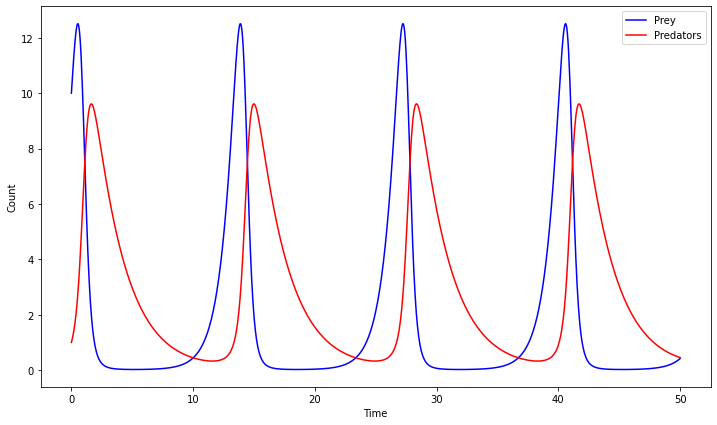

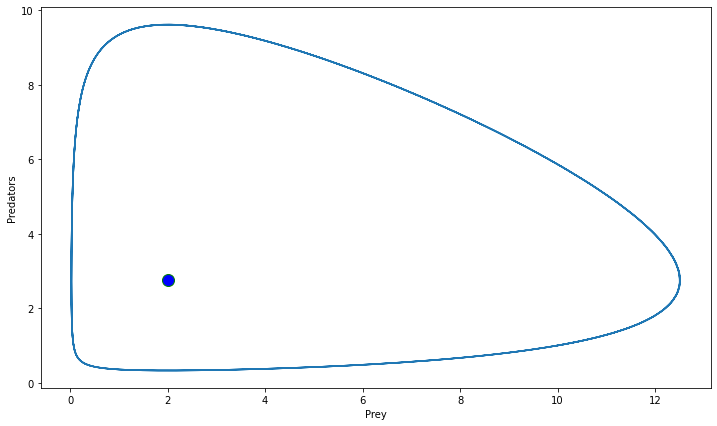

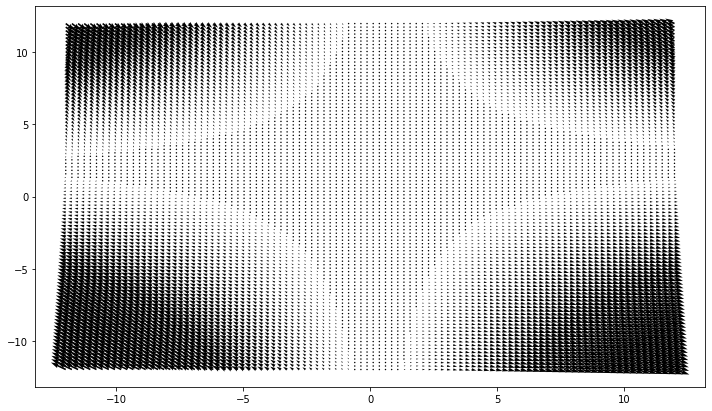

In [4]:
import numpy as np
import matplotlib
# matplotlib.use('tkagg')
import matplotlib.pyplot as plt
from scipy.integrate import odeint


initial_populations = [10,1] # [prey, predators] units in hundreds

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,50,num=1000)

# Pick rates that lead to periodicity
####################################
prey_growth_rate = 1.1 # natural prey growth rate
prey_death_rate = 0.4 # of all pred/prey pairs (their multiple), how much prey death?
predator_growth_rate = 0.2 # of all pred/prey pairs (their multiple), how much predator growth?
predator_death_rate = 0.4 # natural predator death rate

# There actually is a steady state (other than [0,0])
# initial_populations = [predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate] # [prey, predators] units in hundreds


params = [prey_growth_rate, prey_death_rate, predator_growth_rate, predator_death_rate]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):

    # prey population level
    prey_count = current_counts[0]

    # predatory population level
    predator_count = current_counts[1]


    prey_growth_rate = params[0]
    prey_death_rate = params[1]
    predator_growth_rate = params[2]
    predator_death_rate = params[3]

    dxdt = (prey_growth_rate * prey_count) - (prey_death_rate * prey_count * predator_count)
    dydt = (predator_growth_rate * prey_count * predator_count) - (predator_death_rate * predator_count)
    return([dxdt, dydt])

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
plt.figure(figsize = (12, 7))
plt.plot(t,solutions[:,0], color="b",label = "Prey")
plt.plot(t,solutions[:,1], color="r", label = "Predators")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend()
plt.show()


# Added phase diagram
plt.figure(figsize = (12, 7))
plt.plot(solutions[:,0], solutions[:,1])
# Show the fixed point
plt.plot(predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12) #the fixed point
plt.xlabel('Prey')
plt.ylabel('Predators')
plt.show()

# ANOTHER Phase Diagram
# Creating data set
w = 12
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
#U = -1 - X**2 + Y
U = (prey_growth_rate * X) - (prey_death_rate * X * Y)
#V = 1 + X - Y**2
V = (predator_growth_rate * X * Y) - (predator_death_rate * Y)
speed = np.sqrt(U**2 + V**2)
  
# Creating plot
fig = plt.figure(figsize = (12, 7))
#plt.streamplot(X, Y, U, V, density = 1)
plt.quiver(X,Y,U,V)
  
# show plot
plt.show()

In [2]:
# DETERMINE STABILITY OF A FIXED POINT
######################################

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Remember our constant params
##############################
prey_growth_rate = 1.1
prey_death_rate = 0.4
predator_growth_rate = 0.2
predator_death_rate = 0.4

# temp dummy values, so I can type & run this
x = 1
y = 1
# Remember our differentials
# for clarity, 'x' will now be 'prey_count', y will be 'predator_count'
#######################################################################
# dxdt = (prey_growth_rate * prey_count) - (prey_death_rate * prey_count * predator_count)
dxdt = (prey_growth_rate * x) - (prey_death_rate * x * y)
# dydt = (predator_growth_rate * prey_count * predator_count) - (predator_death_rate * predator_count)
dydt = (predator_growth_rate * x * y) - (predator_death_rate * y)

# What is the Jacobian of this system of equations?
# It's a 2 x 2 matrix of the right-sides, partially differentiated against x and partially differentiated against y
# The first row of the Jacobian will be '(prey_growth_rate * x) - (prey_death_rate * x * y)'
#     differentiated against x, and then against y
# Against x, it becomes
#     prey_growth_rate - prey_death_rate*y
# Against y, it becomes
#     prey_death_rate*x
#
# So, the first row of the Jacobian is
#     prey_growth_rate - prey_death_rate*y , prey_death_rate*x
#
#
# The SECOND row of the Jacobian will be '(predator_growth_rate * x * y) - (predator_death_rate * y)'
#     differentiated against x, and then against y
# Against x, it becomes
#     predator_growth_rate*y
# Against y, it becomes
#     predator_growth_rate*x - predator_death_rate
#
# So, the second row of the Jacobian is
#     predator_growth_rate*y , predator_growth_rate*x - predator_death_rate
#
#
# The completed Jacobian looks like this:
J = [[prey_growth_rate - prey_death_rate*y, prey_death_rate*x],
     [predator_growth_rate*y,               predator_growth_rate*x - predator_death_rate]]

# This Jacobian applies to ANY point, but we're interested in a particular fixed point
# From the original differentials,
#    dxdt = (prey_growth_rate * x) - (prey_death_rate * x * y)
#    dydt = (predator_growth_rate * x * y) - (predator_death_rate * y)
# we see that there are 2 points where it's ZERO
#
# FIXED POINTS
# x = y = 0, or
# x = predator_death_rate/predator_growth_rate (=2) , y = prey_growth_rate/prey_death_rate (=2.75)
#
# Substitute in the fixed point coordinates into the Jacobian
J = [[prey_growth_rate - prey_death_rate*2.75, prey_death_rate*2],
     [predator_growth_rate*2.75,               predator_growth_rate*2 - predator_death_rate]]
# Hell, substitute ALL the param values into the Jacobian
J = [[1.1 - 0.4*2.75, 0.4*2],
     [0.2*2.75,       0.2*2 - 0.4]]
# that is,
J = [[0,    0.8],
     [0.55, 0]]


w,v = np.linalg.eig(J)
#Eigenvalues
print(w)
#Eigenvectors
#print(v)

# We see the eigenvalues are real and opposite signs
# Half is pulling in, half is pulling away
# [ 0.66332496 -0.66332496]
# Therefore, UNSTABLE

      



[ 0.66332496 -0.66332496]


# Two domain inhibitory network from paper

In [1]:
import numpy as np
import matplotlib
# matplotlib.use('tkagg')
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import *
from math import isclose
import random

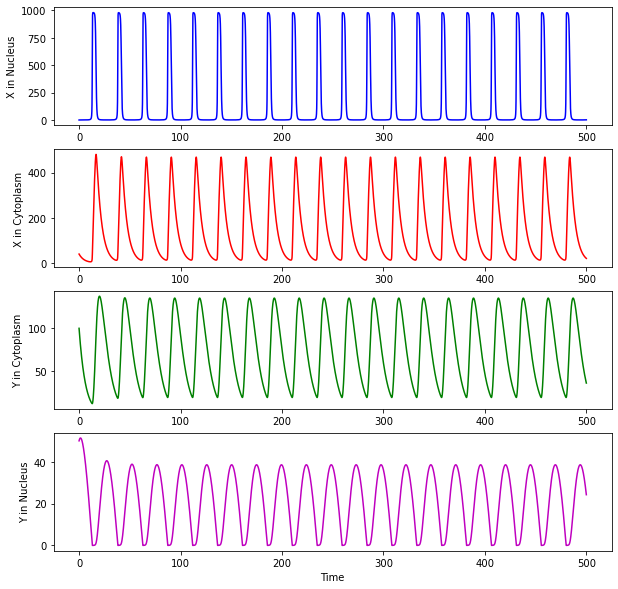

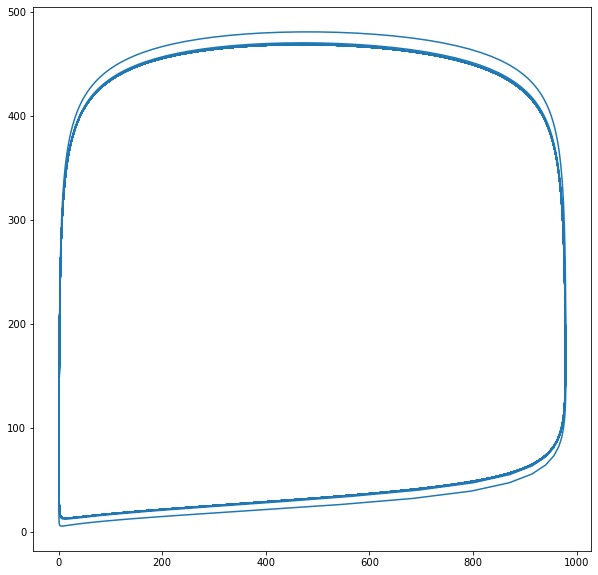

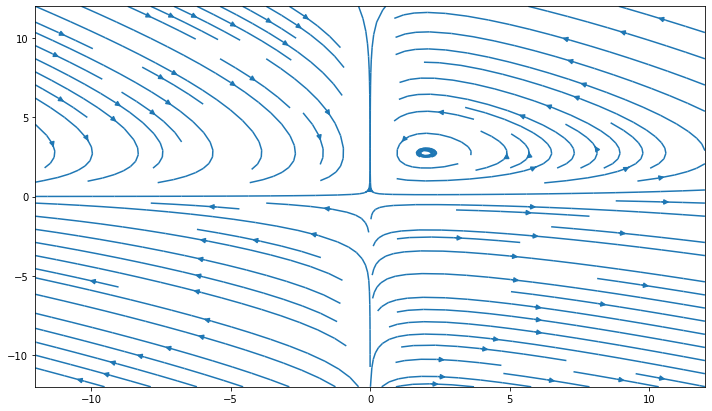

In [4]:
initial_populations = [0,40,100,50] # [prey, predators] units in hundreds

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,500,num=10000)

# Pick rates that lead to periodicity
####################################

# There actually is a steady state (other than [0,0])
# initial_populations = [predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate] # [prey, predators] units in hundreds

sig=1000
p=2
kdxn=10
kexport=0.2
kdxc=0.2
eps=1
kdyn=8
kdyc=0.1
Km=0.1
kimport=0.1

params = [sig, p, kdxn, kexport, kdxc, eps, kdyn, kdyc, Km, kimport]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):

    #xn = 100
    xn = current_counts[0]
    xc = current_counts[1]
    
    yc = current_counts[2]
    yn = current_counts[3]


    sig = params[0]
    p = params[1]
    kdxn = params[2]
    kexport = params[3]
    kdxc = params[4]
    eps = params[5]
    kdyn = params[6]
    kdyc = params[7]
    Km = params[8]
    kimport = params[9]

    dxn_dt = kdxn*(sig/(1 + yn**p) - xn) - kexport*xn 
    dxc_dt = eps*kexport*xn - kdxc*xc
    dyc_dt = kdyc*(xc - yc) - eps*kimport*yc 
    dyn_dt = (kimport*yc) - (kdyn*yn/(Km + yn))




    return([dxn_dt, dxc_dt, dyc_dt, dyn_dt])

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
f,(xn,xc,yc,yn) = plt.subplots(4, figsize = (10,10))

line1, = xn.plot(t,solutions[:,0], color="b")
line2, = xc.plot(t,solutions[:,1], color="r")
line3, = yc.plot(t,solutions[:,2], color="g")
line4, = yn.plot(t,solutions[:,3], color="m")

xn.set_ylabel("X in Nucleus")
xc.set_ylabel("X in Cytoplasm")
yc.set_ylabel("Y in Cytoplasm")
yn.set_ylabel("Y in Nucleus")
yn.set_xlabel("Time")

plt.show()

# Added phase diagram
plt.figure(figsize=(10,10))
plt.plot(solutions[:,0], solutions[:,1])
# Show the fixed point
#plt.plot(predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate, color='green', linestyle='dashed', linewidth = 3,
         #marker='o', markerfacecolor='blue', markersize=12) #the fixed point
plt.show()

# ANOTHER Phase Diagram
# Creating data set
w = 12
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
#U = -1 - X**2 + Y
U = (prey_growth_rate * X) - (prey_death_rate * X * Y)
#V = 1 + X - Y**2
V = (predator_growth_rate * X * Y) - (predator_death_rate * Y)
speed = np.sqrt(U**2 + V**2)
  
# Creating plot
fig = plt.figure(figsize = (12, 7))
plt.streamplot(X, Y, U, V, density = 1)
  
# show plot
plt.show()

# Time Series Plot

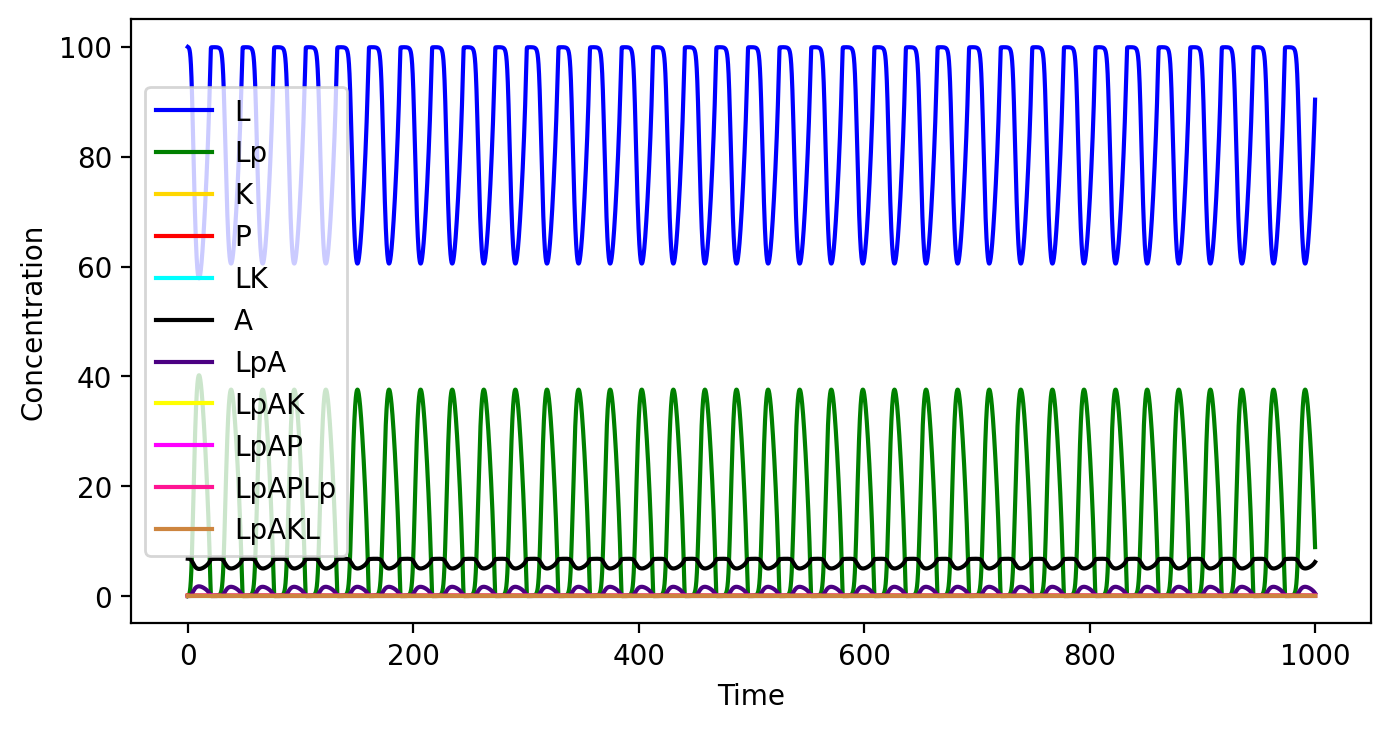

In [38]:
#initial_populations = [1e6,0,0.1,0.1,0,2,0,0,0,0,0,0] # [prey, predators] units in hundreds

#random populations############
#initial_populations = [random.randrange(0, 100, 1) for i in range(11)]

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,1000,num=100000)

# Pick rates that lead to periodicity
####################################

##params = [random.uniform(0, 1) for i in range(12)]

params = [0.015428553603785993, 50.665804402145874, 424.0555774736291, 0.32431515833032026, 36.520032895730864, 31.787900114513594, 106.6488459344832, 0.11721707648587625, 0.33305103317913254, 0.37744673641361715, 106.87562536902328, 200, 2600, 1.965099093948252, 0.001, 100.0, 0.0, 0.07487775872636071, 0.1, 0.0, 6.794066821249323, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
initial_populations = params[15:]
# ka2 = 0.2
# kb2 = 0.1

# ka3 = 0.6
# kb3 = 0.1 

# ka4 = 0.2
# kb4 = 0.1
# kcat4 = 1

# ka5 = 0.3
# kb5 = 0.1
# kcat5 = 2

# ka6 = 0.4
# kb6 = 0.2

# ka7 = 0.6
# kb7 = 0.2

# ka8 = 0.4
# kb8 = 0.1
# kcat8 = 5

# Km4 = (kb4 + kcat4)/ka4
# Km5 = (kb5 + kcat5)/ka5
# Km8 = (kb8 + kcat8)/kb8

# K = 100


# params = [ka1,kb1,kcat1,ka2,kb2,ka3,kb3,ka4,kb4,ka5,kb5,kcat5]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):

    V = params[12]
    VA = params[13]
    A = V/VA
    sigma = params[14]
    y1 = VA/(2*sigma)


    L = current_counts[0] 
    Lp = current_counts[1]
    K = current_counts[2]
    P = current_counts[3]
    LK = current_counts[4]
    A = current_counts[5]
    LpA = current_counts[6]
    LpAK = current_counts[7]
    LpAP = current_counts[8]
    LpAPLp = current_counts[9]
    LpAKL = current_counts[10]
    LpP = current_counts[11]

    ka1 = params[0]
    kb1 = params[1]
    kcat1 = params[2]

    ka2 = params[3]
    kb2 = params[4]

    ka3 = params[5]
    kb3 = params[6]

    ka4 = params[7]
    kb4 = params[8]

    ka5 = params[9]
    kb5 = params[10]
    kcat5 = params[11]

    ka7 = 0
    kb7 = 0
    kcat7 = 0

    ka6 = ka1
    kb6 = kb1
    kcat6 = kcat1



    dL = (kb1*LK) - (ka1*L*K) + (kcat5*LpAPLp) + (kb6*LpAKL) - (y1*ka6*LpAK*L) + (kcat7*LpP)
    dLp = (kcat1*LK) + (kb2*LpA) - (ka2*Lp*A) + (kb5*LpAPLp) - (y1*ka5*Lp*LpAP) + (kcat6*LpAKL) - (ka7*Lp*P) + (kb7*LpP)
    dK = (kb1*LK) - (ka1*L*K) + (kcat1*LK) + (kb3*LpAK) - (ka3*LpA*K)
    dP = (kb4*LpAP) - (ka4*LpA*P) - (ka7*Lp*P) + (kb7*LpP) + (kcat7*LpP)
    dLK = (ka1*L*K) - (kb1*LK) - (kcat1*LK)
    dA = (kb2*LpA) - (ka2*Lp*A)
    dLpA = (ka2*Lp*A) - (kb2*LpA) + (kb3*LpAK) - (ka3*LpA*K) + (kb4*LpAP) - (ka4*LpA*P)
    dLpAK = (ka3*LpA*K) - (kb3*LpAK) + (kb6*LpAKL) - (y1*ka6*LpAK*L) + (kcat6*LpAKL)
    dLpAP = (ka4*LpA*P) - (kb4*LpAP) + (kb5*LpAPLp) - (y1*ka5*LpAP*Lp) + (kcat5*LpAPLp)
    dLpAPLp = (y1*ka5*LpAP*Lp) - (kb5*LpAPLp) - (kcat5*LpAPLp)
    dLpAKL = (y1*ka6*LpAK*L) - (kb6*LpAKL) - (kcat6*LpAKL)
    dLpP = (ka7*Lp*P) - (kb7*LpP) - (kcat7*LpP)

    return([dL, dLp, dK, dP, dLK, dA, dLpA, dLpAK, dLpAP, dLpAPLp, dLpAKL,dLpP])	

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
fig = plt.figure(figsize=(8,4),dpi=200)

plt.plot(t,solutions[:,0], color="b", label = 'L')
plt.plot(t,solutions[:,1], color="g", label = 'Lp')
plt.plot(t,solutions[:,2], color="gold", label = 'K')
plt.plot(t,solutions[:,3], color="r", label = 'P')
plt.plot(t,solutions[:,4], color="cyan", label = 'LK')
plt.plot(t,solutions[:,5], color="black", label = 'A')
plt.plot(t,solutions[:,6], color="indigo", label = 'LpA')
plt.plot(t,solutions[:,7], color="yellow", label = 'LpAK')
plt.plot(t,solutions[:,8], color="magenta", label = 'LpAP')
plt.plot(t,solutions[:,9], color="deeppink", label = 'LpAPLp')
plt.plot(t,solutions[:,10], color="peru", label = 'LpAKL')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()

plt.show()



In [5]:
import numpy as np 
import math
import peakutils
import numpy.fft as fft
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
from matplotlib import cm  
from scipy.integrate import odeint 
import scipy.signal as signal 

In [31]:
'''
The deterministic model of biological oscillator
''' 
class Oscillator: 
	
	def __init__(self, parameter_values, params, initial_conditions, dt = 0.001, mode = 0): 
		self.nParams = len(params)   
		self.params = params #model parameters
		self.parameter_values = parameter_values #allowed parameter ranges  
		self.y0 = initial_conditions 	
		self.dt = dt
		self.T = 200 
		self.N = int(self.T/self.dt) 
		self.ts = np.linspace(0, self.T, self.N) 
		self.amp = 300 #[nM] 		
		self.per = self.T/8 	
		self.sample_rate 		= 0.0033333333 #Hz 
		self.samples_per_hour 	= (1/self.dt)		
		self.jump 				= int(self.samples_per_hour/(self.sample_rate*3600))  	 	
		self.ideal = self.amp*(np.sin(math.pi*(self.ts)/self.per - math.pi/2) + 1) 
		#number of samples for FFT		
		self.nS = self.N/self.jump 
		self.dF = self.sample_rate/self.nS  
		self.idealF = self.getFrequencies(self.ideal) 		 	
		thresholdOne = -(self.nS/2)*100 #10nM -+ from ideal signal harmonics       
		thresholdTwo = 10  
		self.minAmp = 10
		self.maxAmp = 6000 
		self.mode = mode    			
		self.modes = [self.eval]       
		self.threshold = thresholdOne  
		self.omega = 1 #nm^-1 
		if self.mode == 1:
			self.threshold = thresholdTwo
	
	#gets summed difference of arrayData
	@staticmethod 	
	def getDif(indexes, arrayData):	
		arrLen = len(indexes)
		sum = 0
		for i, ind in enumerate(indexes):
			if i == arrLen - 1:
				break
			sum += arrayData[ind] - arrayData[indexes[i + 1]]
			
		#add last peak - same as substracting it from zero 
		sum += arrayData[indexes[-1:]]  
		return sum   
		
	#gets standard deviation 
	@staticmethod 
	def getSTD(indexes, arrayData, window):
		numPeaks = len(indexes)
		arrLen = len(arrayData)
		sum = 0
		for ind in indexes:
			minInd = max(0, ind - window)
			maxInd = min(arrLen, ind + window)
			sum += np.std(arrayData[minInd:maxInd])  
			
		sum = sum/numPeaks 	
		return sum	 
	
	def getFrequencies(self, y):
		#fft sample rate: 1 sample per 5 minutes
		y = y[0::self.jump]  
		res = abs(fft.rfft(y))
		#normalize the amplitudes 
		res = res/math.ceil(self.nS/2) 
		return res

	def costOne(self, Y): 
		p1 = Y[:,1]   
		fftData = self.getFrequencies(p1)     
		
		diff = fftData - self.idealF         
		cost = -np.dot(diff, diff) 		
		return cost,	
		
	def costTwo(self, Y, getAmplitude = False): 
		p1 = Y[:,1]  
		fftData = self.getFrequencies(p1)      
		fftData = np.array(fftData) 
		#find peaks using very low threshold and minimum distance
		indexes = peakutils.indexes(fftData, thres=0.02/max(fftData), min_dist=1)  
		#in case of no oscillations return 0 
		if len(indexes) == 0:     
			return 0,  
		#if amplitude is greater than 400nM
		amp = np.max(fftData[indexes])
		if amp > self.maxAmp: 
			return 0, 
		fitSamples = fftData[indexes]  			
		std = self.getSTD(indexes, fftData, 1)  
		diff = self.getDif(indexes, fftData)  
		cost = std + diff
		#print(cost)   
		if getAmplitude:
			return cost, amp
		return cost, 
		
	def isViableFitness(self, fit):
		return fit >= self.threshold
		
	def isViable(self, point): 
		fitness = self.eval(point, getAmplitude=True)  
		if self.mode == 0:
			return self.isViableFitness(fitness[0]) 
			
		fit = fitness[0] 
		amp = 0
		if fit > 0:
			amp = fitness[1] 
		return self.isViableFitness(fit) and amp >= self.minAmp and amp <= self.maxAmp   
		
	#evaluates a candidate  
	def eval(self, candidate, getAmplitude = False): 
		Y = np.array(self.simulate(candidate)) 
		if self.mode == 0:
			return self.costOne(Y)  
		else:
			return self.costTwo(Y, getAmplitude)      
	
	#simulates a candidate
	def simulate(self, candidate): 
		return odeint(self.oscillatorModelOde, candidate[15:], self.ts, args=(candidate,))   		

	def plotModel(self, subject, mode="ode", show=True):     		
		if mode == "ode":
			t = np.linspace(0, self.T, self.N)
			solutions = self.simulate(subject) 			
		#else:
			#ssa simulation
			#ts,Y = self.represilatorStochastic(subject)
			
		fig = plt.figure(figsize=(8,4),dpi=200)

		plt.plot(t,solutions[:,0], color="b", label = 'L')
		plt.plot(t,solutions[:,1], color="g", label = 'Lp')
		plt.plot(t,solutions[:,2], color="gold", label = 'K')
		plt.plot(t,solutions[:,3], color="r", label = 'P')
		plt.plot(t,solutions[:,4], color="cyan", label = 'LK')
		plt.plot(t,solutions[:,5], color="black", label = 'A')
		plt.plot(t,solutions[:,6], color="indigo", label = 'LpA')
		plt.plot(t,solutions[:,7], color="yellow", label = 'LpAK')
		plt.plot(t,solutions[:,8], color="magenta", label = 'LpAP')
		plt.plot(t,solutions[:,9], color="deeppink", label = 'LpAPLp')
		plt.plot(t,solutions[:,10], color="peru", label = 'LpAKL')

		plt.plot(t,solutions[:,11], color="purple", label = 'PLp')


		plt.xlabel('Time (s)')
		plt.ylabel('Concentration (uM)')
		##plt.ylim(top=110, bottom = -10)
		plt.legend(loc = 'upper right', prop={'size': 6})

		plt.show()
			 				

	def getTotalVolume(self):
		vol = 1.0
		for param in self.params:		
			vol = vol*(self.parameter_values[param]["max"] - self.parameter_values[param]["min"])
		return vol 

	def oscillatorModelOde(self, Y, t, can): 

		V = can[12]
		VA = can[13]
		#A = V/VA
		sigma = can[14]
		#y1 = VA/(2*sigma)
		
		
		ka1 = can[0]
		kb1 = can[1]
		kcat1 = can[2]

		ka2 = can[3]
		kb2 = can[4]

		ka3 = can[5]
		kb3 = can[6]

		ka4 = can[7]
		kb4 = can[8]

		ka5 = can[9]
		kb5 = can[10]
		kcat5 = can[11]

		ka7 = 0
		kb7 = 0
		kcat7 = 0

		ka6 = can[0]
		kb6 = can[1]
		kcat6 = can[2]

	
		# ka6 = can[12] 
		# kb6 = can[13]
		# kcat6 = can[14]

		
		#initial conditions
		L = Y.item(0)   # make sure in uM
		Lp = Y.item(1) 
		K = Y.item(2)
		P = Y.item(3)
		LK = Y.item(4) 
		A = Y.item(5)
		LpA = Y.item(6) 
		LpAK = Y.item(7) 
		LpAP = Y.item(8) 
		LpAPLp = Y.item(9) 
		LpAKL = Y.item(10) 
		LpP = Y.item(11) 
	
		dL = (kb1*LK) - (ka1*L*K) + (kcat5*LpAPLp) + (kb6*LpAKL) - ((VA/(2*sigma))*ka6*LpAK*L) + (kcat7*LpP)
		dLp = (kcat1*LK) + (kb2*LpA) - (ka2*Lp*A) + (kb5*LpAPLp) - ((VA/(2*sigma))*ka5*Lp*LpAP) + (kcat6*LpAKL) - (ka7*Lp*P) + (kb7*LpP)
		dK = (kb1*LK) - (ka1*L*K) + (kcat1*LK) + (kb3*LpAK) - (ka3*LpA*K)
		dP = (kb4*LpAP) - (ka4*LpA*P) - (ka7*Lp*P) + (kb7*LpP) + (kcat7*LpP)
		dLK = (ka1*L*K) - (kb1*LK) - (kcat1*LK)
		dA = (kb2*LpA) - (ka2*Lp*A)
		dLpA = (ka2*Lp*A) - (kb2*LpA) + (kb3*LpAK) - (ka3*LpA*K) + (kb4*LpAP) - (ka4*LpA*P)
		dLpAK = (ka3*LpA*K) - (kb3*LpAK) + (kb6*LpAKL) - ((VA/(2*sigma))*ka6*LpAK*L) + (kcat6*LpAKL)
		dLpAP = (ka4*LpA*P) - (kb4*LpAP) + (kb5*LpAPLp) - ((VA/(2*sigma))*ka5*LpAP*Lp) + (kcat5*LpAPLp)
		dLpAPLp = ((VA/(2*sigma))*ka5*LpAP*Lp) - (kb5*LpAPLp) - (kcat5*LpAPLp)
		dLpAKL = ((VA/(2*sigma))*ka6*LpAK*L) - (kb6*LpAKL) - (kcat6*LpAKL)
		dLpP = (ka7*Lp*P) - (kb7*LpP) - (kcat7*LpP)

		return([dL, dLp, dK, dP, dLK, dA, dLpA, dLpAK, dLpAP, dLpAPLp, dLpAKL, dLpP])	
	
	def getPerAmp(self, subject, mode="ode", indx=0): 
		if mode == "ode":
			ts = np.linspace(0, self.T, self.N) 
			Y = self.simulate(subject)    				
		#else:
			#ts,Y = self.represilatorStochastic(subject) 
		ts = np.array(ts) 
		Y = np.array(Y) 
		sig = Y[:, indx]
		indx_max, properties = signal.find_peaks(sig, prominence = (np.max(sig) - np.min(sig))/4, distance = len(ts)/100)      
		indx_min, properties = signal.find_peaks(sig*-1, prominence = (np.max(sig) - np.min(sig))/4, distance = len(ts)/100)     

		amps = [] 
		pers = []   
		for i in range(min(len(indx_max), len(indx_min))):
			amps.append((sig[indx_max[i]] - sig[indx_min[i]])/2) 			
			if i + 1 < len(indx_max):
				pers.append(ts[indx_max[i + 1]] - ts[indx_max[i]])
			if i + 1 < len(indx_min):
				pers.append(ts[indx_min[i + 1]] - ts[indx_min[i]])
		
		if len(amps) > 0 and len(pers) > 0:
			amps = np.array(amps)   	
			pers = np.array(pers)  
			
			#print(amps)
			amp = np.mean(amps)	
			#print(pers) 
			per = np.mean(pers) 
		else:
			amp = 0
			per = 0  
		
		print("amp" + str(amp)) 
		print("per" + str(per))   	
		
		return per, amp 
	

In [32]:
parameter_values = {  "ka1": {"min": 1000/1e6, "max": 1e6/1e6},  
            "kb1": {"min": 0, "max": 100},             				        
            "kcat1": {"min": 0, "max": 500},         
            "ka2": {"min": 1000/1e6, "max": 1e6/1e6},         
            "kb2": {"min": 0, "max": 1000}, 
            "ka3": {"min": 1e3/1e6, "max":1e8/1e6}, 
            "kb3": {"min": 0, "max":500},
            "ka4": {"min": 1e3/1e6, "max":1e6/1e6},
            "kb4": {"min": 0, "max": 100},  
            "ka5": {"min": 1e3/1e6, "max": 1e6/1e6}, 
            "kb5": {"min": 0, "max": 1000}, 
            "kcat5": {"min": 0, "max": 200},
            "V": {"min": 2600, "max": 2600},
            "VA": {"min": 0.5, "max": 2},
            "sigma": {"min": 0.001, "max": 0.001},
            "L": {"min": 1, "max": 1e2},  
            "Lp": {"min": 0, "max": 0}, 
            "K": {"min": 0.01, "max": 0.1},
            "P": {"min": 0.01, "max": 0.1},
            "LK": {"min": 0, "max": 0}, 
            "A": {"min": .1, "max": 10}, 
            "LpA": {"min": 0, "max": 0},
            "LpAK": {"min": 0, "max": 0}, 
            "LpAP": {"min": 0, "max": 0}, 	
            "LpAPLp": {"min": 0, "max": 0},
            "LpAKL": {"min": 0, "max": 0},
            "LpP": {"min": 0, "max": 0},
            }   	

filename =  os.path.join(".", "SIMPLE2_oscillatorCostTwo")  
print(filename)   
model = Oscillator(parameter_values, np.array(["ka1", "kb1", "kcat1", "ka2", "kb2", "ka3", "kb3", "ka4","kb4","ka5","kb5","kcat5","V","VA","sigma","L","Lp","K","P","LK","A","LpA","LpAK","LpAP","LpAPLp","LpAKL","LpP"]), np.array(["L","Lp","K","P",0,"A",0,0,0,0,0,0]), mode=1)  
#solver = Solver(model)         
#solver.run(filename) 

./SIMPLE2_oscillatorCostTwo


In [39]:
model.eval(params)

(array([20.18053421]),)

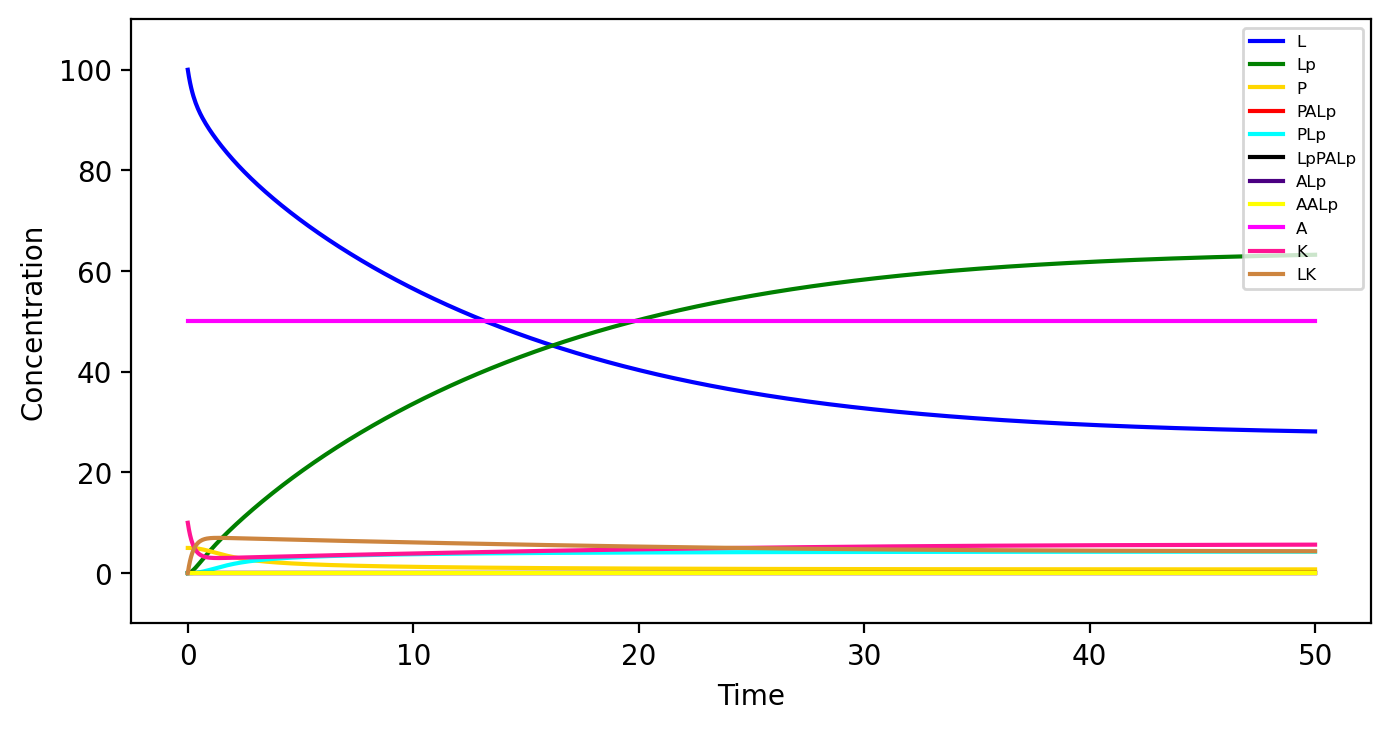

In [48]:
#L, Lp, P, PALp, PLp, LpPALp, ALp, AALp, A, K, LK
initial_populations = [100,0,5,0,0,0,0,0,50,10,0] 

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,50,num=1000)

# Pick rates that lead to periodicity
####################################

# There actually is a steady state (other than [0,0])
# initial_populations = [predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate] # [prey, predators] units in hundreds

g = 1000
h = g/100000

ka2 = 0
kb2 = 0.1#0.1

ka3 = ka2*2
kb3 = 0#0.1 

ka4 = 0.1
kb4 = 0.1
kcat4 = 1

ka5 = 0.03
kb5 = 0.1
kcat5 = 1

ka6 = ka2*2
kb6 = 0.1#0.2

ka7 = ka4*2
kb7 = 0.1#0.2

ka8 = ka4*2
kb8 = 0.1#0.1
kcat8 = 1#1


params = [ka2,kb2,ka3,kb3,ka4,kb4,kcat4,ka5,kb5,kcat5,ka6,kb6,ka7,kb7,ka8,kb8,kcat8]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):


    L = current_counts[0] 
    Lp = current_counts[1]
    
    P = current_counts[2]
    PALp = current_counts[3]

    PLp = current_counts[4]
    LpPALp = current_counts[5]

    ALp = current_counts[6]
    AALp = current_counts[7]
    A = current_counts[8]
    K = current_counts[9] 
    LK = current_counts[10]



    ka2 = params[0] 
    kb2 = params[1]

    ka3 = params[2]
    kb3 = params[3]

    ka4 = params[4]
    kb4 = params[5]
    kcat4 = params[6]

    ka5 = params[7]
    kb5 = params[8]
    kcat5 = params[9]

    ka6 = params[10]
    kb6 = params[11]

    ka7 = params[12]
    kb7 = params[13]

    ka8 = params[14]
    kb8 = params[15]
    kcat8 = params[16]

    dL = (kcat4*PLp)+(kcat8*LpPALp)+(kb5*LK)-(ka5*L*K)
    dLp = (kcat5*LK) + (kb2*ALp)+(kb3*ALp**2)+(kb4*PLp)+(kb8*LpPALp)-(ka4*Lp*P)-(ka8*Lp*PALp)-(ka3*Lp*AALp)-(ka2*Lp*A)
    dP = (kcat4*PLp) + (kb4*PLp) - (ka4*Lp*P)-(ka7*P*ALp)+(kb7*PALp) 
    dPALp = (ka7*P*ALp)-(kb7*PALp)+(kcat8*LpPALp)+(kb8*LpPALp)-(ka8*Lp*PALp)
    dPLp = (ka4*Lp*P)-(kb4*PLp)-(kcat4*PLp)
    dLpPALp = (ka8*Lp*PALp)-(kb8*LpPALp)-(kcat8*LpPALp)
    dALp = (ka2*Lp*A)-(kb2*ALp)-(ka6*A*ALp)+(kb6*AALp)-(ka7*P*ALp)+(kb7*PALp)+(2*ka3*Lp*AALp)
    dAALp = (ka6*A*ALp)-(kb6*AALp)-(ka3*Lp*AALp)+(kb3*ALp**2)
    dA = (kb2*ALp)-(ka2*Lp*A)+(kb6*AALp)-(ka6*A*ALp)
    dK = (kcat5*LK)+(kb5*LK)-(ka5*L*K)
    dLK = (ka5*L*K)-(kcat5*LK)-(kb5*LK)



    return([dL, dLp, dP, dPALp, dPLp, dLpPALp, dALp, dAALp, dA, dK, dLK])

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
fig = plt.figure(figsize=(8,4),dpi=200)

plt.plot(t,solutions[:,0], color="b", label = 'L')
plt.plot(t,solutions[:,1], color="g", label = 'Lp')
plt.plot(t,solutions[:,2], color="gold", label = 'P')
plt.plot(t,solutions[:,3], color="r", label = 'PALp')
plt.plot(t,solutions[:,4], color="cyan", label = 'PLp')
plt.plot(t,solutions[:,5], color="black", label = 'LpPALp')
plt.plot(t,solutions[:,6], color="indigo", label = 'ALp')
plt.plot(t,solutions[:,7], color="yellow", label = 'AALp')
plt.plot(t,solutions[:,8], color="magenta", label = 'A')
plt.plot(t,solutions[:,9], color="deeppink", label = 'K')
plt.plot(t,solutions[:,10], color="peru", label = 'LK')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.ylim(top=110, bottom = -10)
plt.legend(loc = 'upper right', prop={'size': 6})

plt.show()



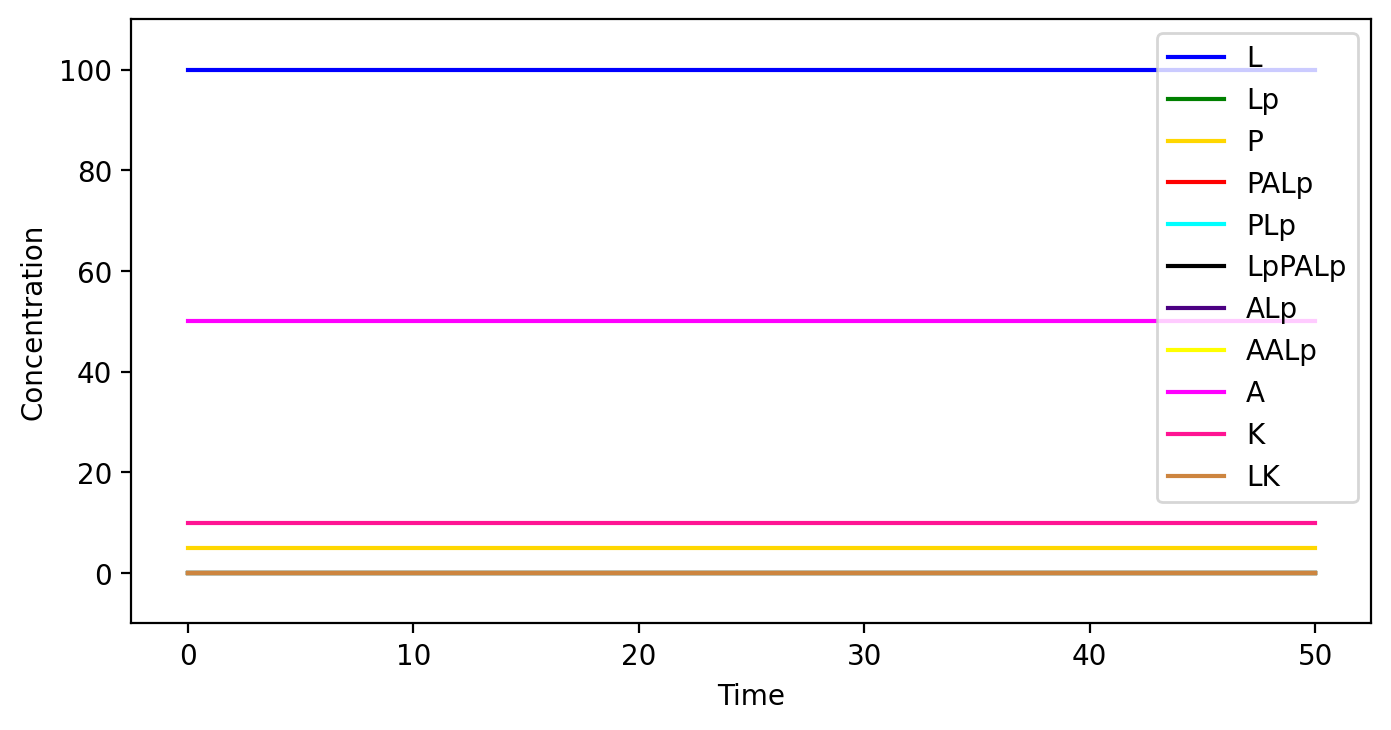

In [45]:
#L, Lp, P, PALp, PLp, LpPALp, ALp, AALp, A, K, LK
initial_populations = [100,0,5,0,0,0,0,0,50,10,0] 

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,50,num=1000)

# Pick rates that lead to periodicity
####################################

# There actually is a steady state (other than [0,0])
# initial_populations = [predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate] # [prey, predators] units in hundreds

ka2 = 0.1 
kb2 = 0.1#0.1

ka3 = ka2*2
kb3 = 0#0.1 

ka4 = 0.1
kb4 = 0.1
kcat4 = 1

ka5 = 0.03
kb5 = 0.1
kcat5 = 1

ka6 = ka2*2
kb6 = 0.1#0.2

ka7 = ka4*2
kb7 = 0.1#0.2

ka8 = ka4*2
kb8 = 0.1#0.1
kcat8 = 1#1

g = 1000


params = [ka2,kb2,ka3,kb3,ka4,kb4,kcat4,ka5,kb5,kcat5,ka6,kb6,ka7,kb7,ka8,kb8,kcat8, g]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):


    L = current_counts[0] 
    Lp = current_counts[1]
    
    P = current_counts[2]
    PALp = current_counts[3]

    PLp = current_counts[4]
    LpPALp = current_counts[5]

    ALp = current_counts[6]
    AALp = current_counts[7]
    A = current_counts[8]
    K = current_counts[9] 
    LK = current_counts[10]

    g = params[17]
    h = g/100000

    ka2 = params[1] * 0
    kb2 = params[1]

    ka3 = params[2]
    kb3 = params[3]

    ka4 = params[4]
    kb4 = params[5]
    kcat4 = params[6]

    ka5 = params[7]
    kb5 = params[8]
    kcat5 = params[9]

    ka6 = params[10]
    kb6 = params[11]

    ka7 = params[12]
    kb7 = params[13]

    ka8 = params[14]
    kb8 = params[15]
    kcat8 = params[16]

    dL = (kcat4*PLp)+(kcat8*LpPALp)+(kb5*LK)-(ka5*L*K)
    dLp = (kcat5*LK) + (kb2*ALp)+(kb3*ALp**2)+(kb4*PLp)+(kb8*LpPALp)-(ka4*Lp*P)-(ka8*Lp*PALp)-(ka3*Lp*AALp)-(ka2*Lp*A)
    dP = (kcat4*PLp) + (kb4*PLp) - (ka4*Lp*P)-(ka7*P*ALp)+(kb7*PALp) 
    dPALp = (ka7*P*ALp)-(kb7*PALp)+(kcat8*LpPALp)+(kb8*LpPALp)-(ka8*Lp*PALp)
    dPLp = (ka4*Lp*P)-(kb4*PLp)-(kcat4*PLp)
    dLpPALp = (ka8*Lp*PALp)-(kb8*LpPALp)-(kcat8*LpPALp)
    dALp = (ka2*Lp*A)-(kb2*ALp)-(ka6*A*ALp)+(kb6*AALp)-(ka7*P*ALp)+(kb7*PALp)+(2*ka3*Lp*AALp)
    dAALp = (ka6*A*ALp)-(kb6*AALp)-(ka3*Lp*AALp)+(kb3*ALp**2)
    dA = (kb2*ALp)-(ka2*Lp*A)+(kb6*AALp)-(ka6*A*ALp)
    dK = (kcat5*LK)+(kb5*LK)-(ka5*L*K)
    dLK = (ka5*L*K)-(kcat5*LK)-(kb5*LK)



    return([dL, dLp, dP, dPALp, dPLp, dLpPALp, dALp, dAALp, dA, dK, dLK])

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
fig = plt.figure(figsize=(8,4),dpi=200)

plt.plot(t,solutions[:,0], color="b", label = 'L')
plt.plot(t,solutions[:,1], color="g", label = 'Lp')
plt.plot(t,solutions[:,2], color="gold", label = 'P')
plt.plot(t,solutions[:,3], color="r", label = 'PALp')
plt.plot(t,solutions[:,4], color="cyan", label = 'PLp')
plt.plot(t,solutions[:,5], color="black", label = 'LpPALp')
plt.plot(t,solutions[:,6], color="indigo", label = 'ALp')
plt.plot(t,solutions[:,7], color="yellow", label = 'AALp')
plt.plot(t,solutions[:,8], color="magenta", label = 'A')
plt.plot(t,solutions[:,9], color="deeppink", label = 'K')
plt.plot(t,solutions[:,10], color="peru", label = 'LK')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.ylim(top=110, bottom = -10)
plt.legend()

plt.show()



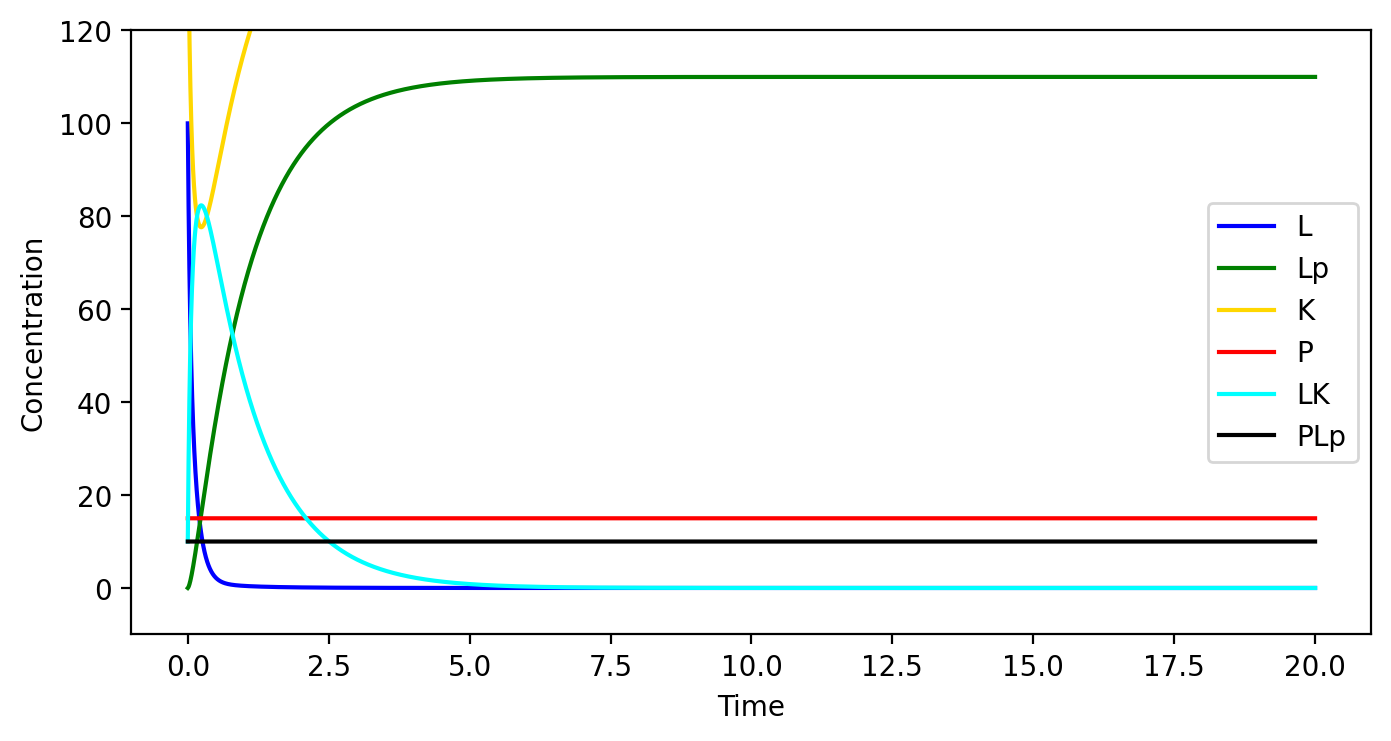

In [7]:
#L, Lp, P, PALp, PLp, LpPALp, ALp, AALp, A, K, LK
initial_populations = [100, 0, 150, 15,10,10]

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,20,num=10000)

# Pick rates that lead to periodicity
####################################

# There actually is a steady state (other than [0,0])
# initial_populations = [predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate] # [prey, predators] units in hundreds

ka1 = 0.1
kb1 = 0.1
kcat1 = 1

ka2 = 0
kb2 = 0
kcat2 = 0


params = [ka1,kb1,kcat1,ka2,kb2,kcat2]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):


    L = current_counts[0]
    Lp = current_counts[1]
    
    K = current_counts[2]
    P = current_counts[3]
    
    LK = current_counts[4]
    PLp = current_counts[5]
    



    ka1 = params[0]
    kb1 = params[1]
    kcat1 = params[2]

    ka2 = params[3]
    kb2 = params[4]
    kcat2 = params[5]
    

    dL = (kb1*LK) + (kcat2*PLp)- (ka1*L*K) 
    dLp = (kcat1*LK) + (kb2*PLp) - (ka2*Lp*P)
    dK = (kcat1*LK) + (kb1*LK) - (ka1*L*K)
    dP = (kcat2*PLp) + (kb2*PLp) - (ka2*Lp*P)
    dLK = (ka1*L*K) - (kb1*LK) - (kcat1*LK)
    dPLp = (ka2*Lp*P) - (kb2*PLp) - (kcat2*PLp)



    return([dL, dLp, dK, dP, dLK, dPLp])

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
fig = plt.figure(figsize=(8,4),dpi=200)

plt.plot(t,solutions[:,0], color="b", label = 'L')
plt.plot(t,solutions[:,1], color="g", label = 'Lp')
plt.plot(t,solutions[:,2], color="gold", label = 'K')
plt.plot(t,solutions[:,3], color="r", label = 'P')
plt.plot(t,solutions[:,4], color="cyan", label = 'LK')
plt.plot(t,solutions[:,5], color="black", label = 'PLp')


plt.xlabel('Time')
plt.ylabel('Concentration')
plt.ylim(top=120, bottom = -10)
plt.legend()

plt.show()



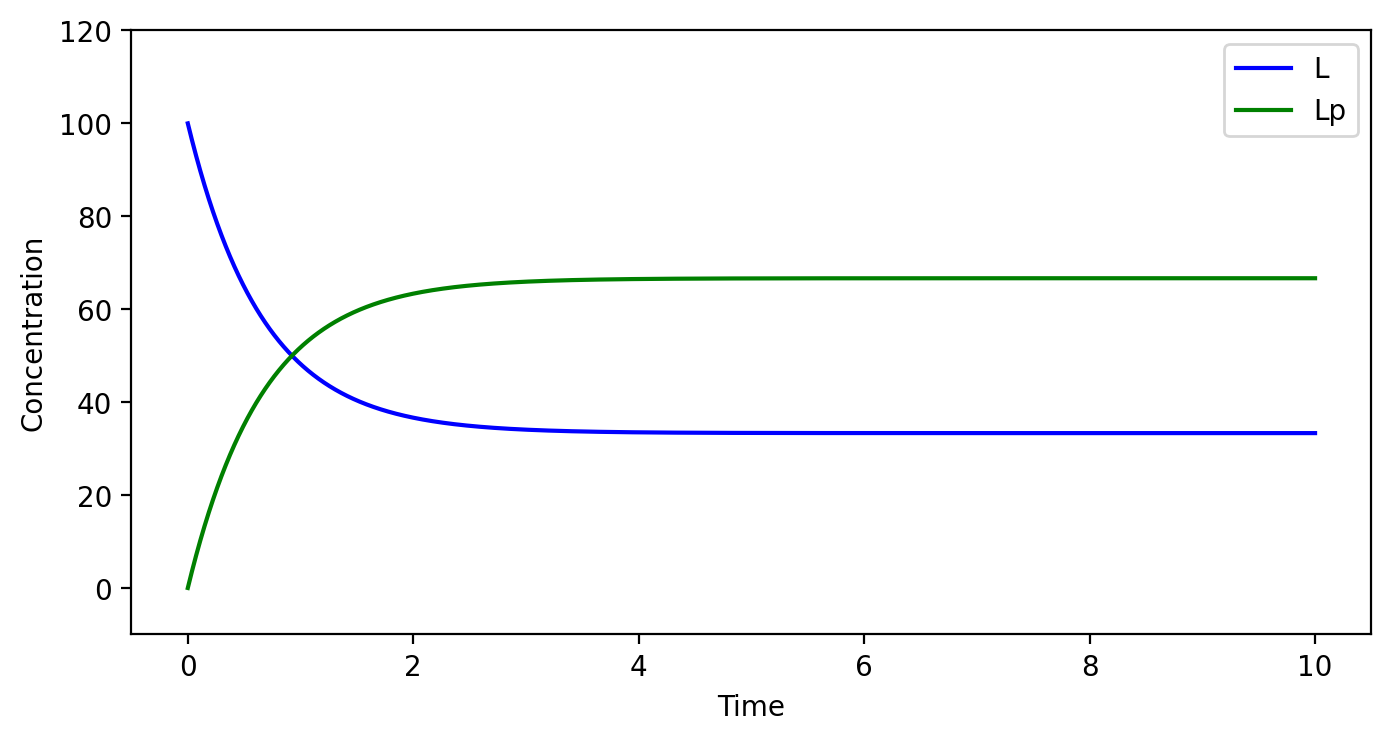

In [9]:
#L, Lp, P, PALp, PLp, LpPALp, ALp, AALp, A, K, LK
initial_populations = [100, 0]

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,10,num=100000)

# Pick rates that lead to periodicity
####################################

# There actually is a steady state (other than [0,0])
# initial_populations = [predator_death_rate/predator_growth_rate , prey_growth_rate/prey_death_rate] # [prey, predators] units in hundreds

ka1 = 1
kb1 = 0.5
#kcat1 = 5

ka2 = 0.2
kb2 = 0.1
#kcat2 = 0


params = [ka1,kb1,ka2,kb2]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):


    L = current_counts[0]
    Lp = current_counts[1]




    ka1 = params[0]
    kb1 = params[1]

    

    dL = (kb1*Lp)-(ka1*L) 
    dLp = (ka1*L)-(kb1*Lp)
    



    return([dL, dLp])

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
fig = plt.figure(figsize=(8,4),dpi=200)

plt.plot(t,solutions[:,0], color="b", label = 'L')
plt.plot(t,solutions[:,1], color="g", label = 'Lp')
#plt.plot(t,solutions[:,2], color="gold", label = 'K')
#plt.plot(t,solutions[:,3], color="r", label = 'P')
#plt.plot(t,solutions[:,4], color="cyan", label = 'LK')
#plt.plot(t,solutions[:,5], color="black", label = 'PLp')


plt.xlabel('Time')
plt.ylabel('Concentration')
plt.ylim(top=120, bottom = -10)
plt.legend()

plt.show()



# Phase Diagrams

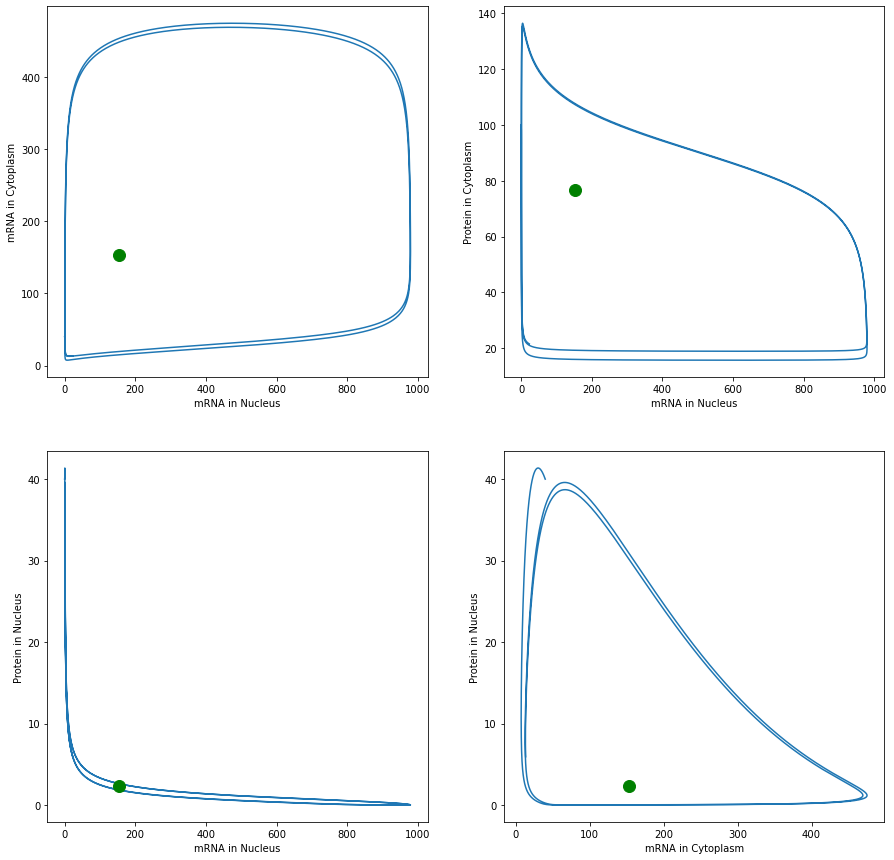

In [6]:


#find fixed points
sig = params[0]
p = params[1]
kdxn = params[2]
kexport = params[3]
kdxc = params[4]
eps = params[5]
kdyn = params[6]
Km = params[7]
kimport = params[8]

xn,xc,yc,yn = symbols('xn,xc,yc,yn')

eq1 = kdxn*(sig/(1 + yn**p) - xn) - kexport*xn 
eq2 = eps*kexport*xn - kdxc*xc
eq3 = kdyc*(xc - yc) - eps*kimport*yc 
eq4 = (kimport*yc) - (kdyn*yn/(Km + yn))

system = [eq1,eq2,eq3,eq4]
init_conc = [initial_populations[0],initial_populations[1],initial_populations[2],initial_populations[3]]
init_sol = np.random.rand(len(init_conc))*max(init_conc)

result = False
while result is False:
    try:
        init_sol = np.random.rand(len(init_conc))*max(init_conc)
        solution = nsolve(system, [xn,xc,yc,yn], init_sol, verify=True)
        if solution[3] > 0:
            result = True
            break
    except ValueError:
        pass

x_nuc = solution[0]
x_cyt = solution[1]
y_cyt = solution[2]
y_nuc = solution[3]
#solution = nsolve(system, [xn,xc,yc,yn], init_sol, verify=True)

# Added phase diagram
fig, axs = plt.subplots(2,2, figsize = (15,15))

axs[0,0].plot(solutions[:,0], solutions[:,1])
axs[0,0].plot(x_nuc, x_cyt, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=12) #the fixed point
axs[0,0].set_xlabel('mRNA in Nucleus')
axs[0,0].set_ylabel('mRNA in Cytoplasm')

axs[0,1].plot(solutions[:,0], solutions[:,2])
axs[0,1].plot(x_nuc, y_cyt, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=12) #the fixed point
axs[0,1].set_xlabel('mRNA in Nucleus')
axs[0,1].set_ylabel('Protein in Cytoplasm')

axs[1,0].plot(solutions[:,0], solutions[:,3])
axs[1,0].plot(x_nuc, y_nuc, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=12) #the fixed point
axs[1,0].set_xlabel('mRNA in Nucleus')
axs[1,0].set_ylabel('Protein in Nucleus')

axs[1,1].plot(solutions[:,1], solutions[:,3])
axs[1,1].plot(x_cyt, y_nuc, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=12) #the fixed point
axs[1,1].set_xlabel('mRNA in Cytoplasm')
axs[1,1].set_ylabel('Protein in Nucleus')

# Show the fixed point



#plot nullclines

plt.show()



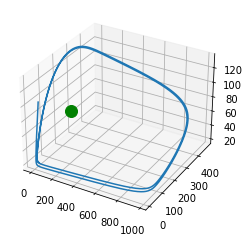

In [11]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.plot3D(solutions[:,0], solutions[:,1], solutions[:,2])
ax.plot3D(x_nuc,x_cyt,y_cyt, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=12)


# Everything below is test/junk

In [101]:
sig = params[0]
p = params[1]
kdxn = params[2]
kexport = params[3]
kdxc = params[4]
eps = params[5]
kdyn = params[6]
Km = params[7]
kimport = params[8]

xn,xc,yc,yn = symbols('xn,xc,yc,yn')

eq1 = kdxn*(sig/(1 + yn**p) - xn) - kexport*xn 
eq2 = eps*kexport*xn - kdxc*xc
eq3 = kdyc*(xc - yc) - eps*kimport*yc 
eq4 = (kimport*yc) - (kdyn*yn/(Km + yn))

system = [eq1,eq2,eq3,eq4]
init_conc = [initial_populations[0],initial_populations[1],initial_populations[2],initial_populations[3]]
init_sol = np.random.rand(len(init_conc))*max(init_conc)

solution = nsolve(system, [xn,xc,yc,yn], init_sol, verify=True, dict=True)

solution

[{xn: 153.393690839455,
  xc: 153.393690839455,
  yc: 76.6968454197277,
  yn: 2.32192722307914}]

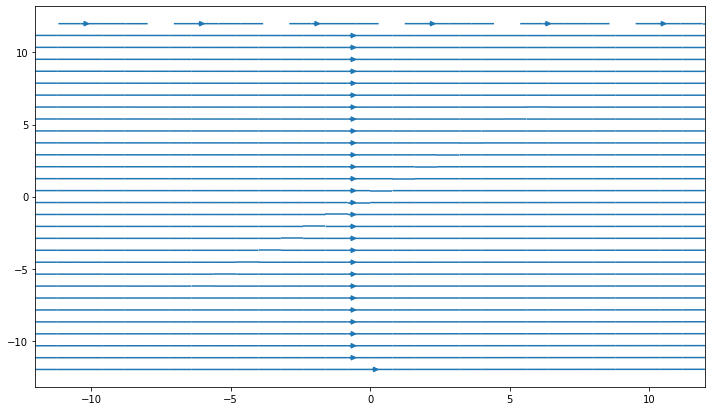

In [143]:
# ANOTHER Phase Diagram
# Creating data set
w = 12
Xc, Xn= np.mgrid[-w:w:100j, -w:w:100j]
#U = -1 - X**2 + Y
U = kdxn*(sig/(1 + 1**p) - Xn) - kexport*Xn 
#V = 1 + X - Y**2
V = eps*kexport*Xn - kdxc*Xc

#W = kdyc*(Xc - Yc) - eps*kimport*Yc

#X = (kimport*Yc) - (kdyn*Yn/(Km + Yn))
speed = np.sqrt(Xn**2 + Xc**2)
  
# Creating plot
fig = plt.figure(figsize = (12, 7))
plt.streamplot(Xn, Xc, U, V, density = 1)
  
# show plot
plt.show()

In [133]:
U

array([[122.4 + 10000/(yn**2 + 1), 119.927272727273 + 10000/(yn**2 + 1),
        117.454545454545 + 10000/(yn**2 + 1), ...,
        -117.454545454545 + 10000/(yn**2 + 1),
        -119.927272727273 + 10000/(yn**2 + 1),
        -122.4 + 10000/(yn**2 + 1)],
       [122.4 + 10000/(yn**2 + 1), 119.927272727273 + 10000/(yn**2 + 1),
        117.454545454545 + 10000/(yn**2 + 1), ...,
        -117.454545454545 + 10000/(yn**2 + 1),
        -119.927272727273 + 10000/(yn**2 + 1),
        -122.4 + 10000/(yn**2 + 1)],
       [122.4 + 10000/(yn**2 + 1), 119.927272727273 + 10000/(yn**2 + 1),
        117.454545454545 + 10000/(yn**2 + 1), ...,
        -117.454545454545 + 10000/(yn**2 + 1),
        -119.927272727273 + 10000/(yn**2 + 1),
        -122.4 + 10000/(yn**2 + 1)],
       ...,
       [122.4 + 10000/(yn**2 + 1), 119.927272727273 + 10000/(yn**2 + 1),
        117.454545454545 + 10000/(yn**2 + 1), ...,
        -117.454545454545 + 10000/(yn**2 + 1),
        -119.927272727273 + 10000/(yn**2 + 1),
     

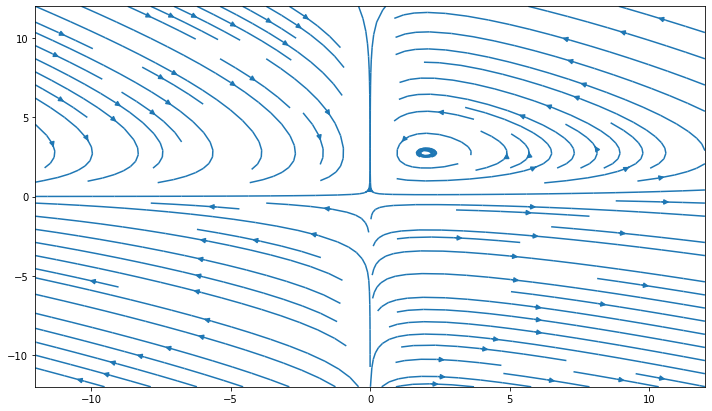

In [122]:
w = 12
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
#U = -1 - X**2 + Y
U = (prey_growth_rate * X) - (prey_death_rate * X * Y)
#V = 1 + X - Y**2
V = (predator_growth_rate * X * Y) - (predator_death_rate * Y)
speed = np.sqrt(U**2 + V**2)
  
# Creating plot
fig = plt.figure(figsize = (12, 7))
plt.streamplot(X, Y, U, V, density = 1)
  
# show plot
plt.show()

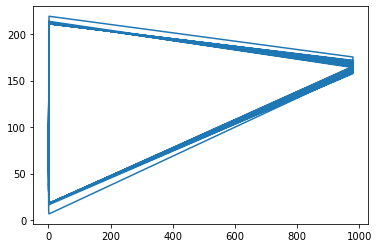

In [251]:
nullcline_xn = []
nullcline_xc = []
nullcline_yc = []
nullcline_yn = []

#def find_nullcline(solutions = solutions, equations = equations):
for i in solutions:
    xn = i[0]
    xc = i[1]
    yc = i[2]
    yn = i[3]

    eq1 = kdxn*(sig/(1 + yn**p) - xn) - kexport*xn 
    eq2 = eps*kexport*xn - kdxc*xc
    eq3 = kdyc*(xc - yc) - eps*kimport*yc 
    eq4 = (kimport*yc) - (kdyn*yn/(Km + yn))

    equations = [eq1,eq2,eq3,eq4]
    if isclose(equations[0], 0.0, abs_tol= 1):
        nullcline_xn.append(i)
    if isclose(equations[1], 0.0, abs_tol= 1):
        nullcline_xc.append(i)
    if isclose(equations[2], 0.0, abs_tol= 1):
        nullcline_yc.append(i)
    if isclose(equations[3], 0.0, abs_tol= 1):
        nullcline_yn.append(i)

#### plotting dictionaries for each nullcline, containing lists of each species
null_xn_dict = {}

null_xn_dict[xn] = [item[0] for item in nullcline_xn]
null_xn_dict[xc] = [item[1] for item in nullcline_xn]
null_xn_dict[yc] = [item[2] for item in nullcline_xn]
null_xn_dict[yn] = [item[3] for item in nullcline_xn]

null_xc_dict = {}

null_xc_dict[xn] = [item[0] for item in nullcline_xc]
null_xc_dict[xc] = [item[1] for item in nullcline_xc]
null_xc_dict[yc] = [item[2] for item in nullcline_xc]
null_xc_dict[yn] = [item[3] for item in nullcline_xc]

null_yc_dict = {}

null_yc_dict[xn] = [item[0] for item in nullcline_yc]
null_yc_dict[xc] = [item[1] for item in nullcline_yc]
null_yc_dict[yc] = [item[2] for item in nullcline_yc]
null_yc_dict[yn] = [item[3] for item in nullcline_yc]

null_yn_dict = {}

null_yn_dict[xn] = [item[0] for item in nullcline_yn]
null_yn_dict[xc] = [item[1] for item in nullcline_yn]
null_yn_dict[yc] = [item[2] for item in nullcline_yn]
null_yn_dict[yn] = [item[3] for item in nullcline_yn]

plt.plot(null_xn_dict[xn], null_xn_dict[xc])



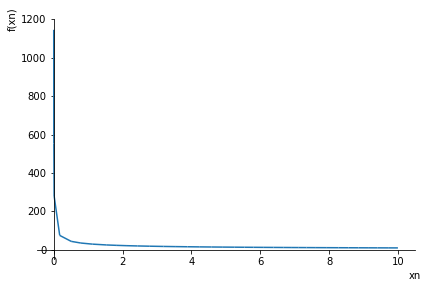

In [15]:
xn,xc,yc,yn = symbols('xn,xc,yc,yn')

eq1 = kdxn*(sig/(1 + yn**p) - xn) - kexport*xn 

y = solve(eq1, yn)[1]
plot(y, (xn, -10, 10))

In [245]:
o = [item[0] for item in nullcline_xn]
o

[0.0,
 0.1562807939542653,
 0.24952034846918228,
 0.30493373286652264,
 0.3376610822973963,
 0.35679294668621325,
 0.3677873220386399,
 0.3739210179166555,
 0.3771611292864323,
 0.3786883474902538,
 0.3792111772407214,
 0.3791546058318084,
 0.3787734093289591,
 0.3782201730682121,
 0.3775861399915427,
 0.37692573866923257,
 0.37627130993595903,
 0.37564194638256954,
 0.3750488083905645,
 0.37449830475530965,
 0.3739940060855371,
 0.37353779913036345,
 0.373130563910286,
 0.37277260382812677,
 0.37246388038500844,
 0.37220416463957295,
 0.3719931314801333,
 0.3718304031579153,
 0.37171558737219884,
 0.3716482935435896,
 0.3716281443977702,
 0.371654781647152,
 0.37172787003821733,
 0.3718470988875099,
 0.37201218310490325,
 0.3722228634203427,
 0.3724789062015207,
 0.3727801035173191,
 0.37312627198251425,
 0.37351725439916994,
 0.3739529181432245,
 0.3744331546317068,
 0.37495787941179765,
 0.37552703190375725,
 0.3761405750282818,
 0.3767984947396074,
 0.377500800328248,
 0.3782475240

In [ ]:
eq1 = kdxn*(sig/(1 + 0**p) - xn) - kexport*xn 

solve(eq1, xn)

In [ ]:
for i in range(r):
        for y in range(r):
            if ((f(x,y) == 0) and (g(x,y) == 0)):
                fp.append((x,y))
                print('The system has a fixed point in %s,%s' % (x,y))
    return fp

In [193]:

for i in solutions:
    print(i)

[  0.  40. 100.  50.]
[ 0.15628079 39.60279909 99.2029154  50.09881229]
[ 0.24952035 39.21076519 98.41179956 50.19365215]
[ 0.30493373 38.82335585 97.62661735 50.28454943]
[ 0.33766108 38.44023046 96.8473318  50.37153375]
[ 0.35679295 38.06116978 96.07390498 50.45463459]
[ 0.36778732 37.68602756 95.30629843 50.53388121]
[ 0.37392102 37.31470155 94.54447344 50.60930267]
[ 0.37716113 36.94711603 93.78839127 50.68092786]
[ 0.37868835 36.58321137 93.03801324 50.74878545]
[ 0.37921118 36.22293773 92.29330078 50.81290394]
[ 0.37915461 35.86625128 91.55421545 50.87331162]
[ 0.37877341 35.51311192 90.82071901 50.93003659]
[ 0.37822017 35.16348196 90.09277339 50.98310677]
[ 0.37758614 34.81732526 89.37034073 51.03254986]
[ 0.37692574 34.47460675 88.65338337 51.07839341]
[ 0.37627131 34.13529211 87.94186383 51.12066475]
[ 0.37564195 33.79934766 87.23574486 51.15939103]
[ 0.37504881 33.46674014 86.53498941 51.19459924]
[ 0.3744983  33.13743677 85.83956061 51.22631614]
[ 0.37399401 32.81140509 85.

In [185]:
t = np.array([1,2,3])
t = np.vstack([t,[4,5,6]])

t[1]

array([4, 5, 6])

In [188]:
u = np.array(0)
u.shape

()

In [180]:
solutions[1]

array([ 0.15628079, 39.60279909, 99.2029154 , 50.09881229])

In [222]:
xn = 153.393690839455
xc = 153.393690839455
yc = 76.6968454197277
yn = 2.32192722307914

print(equations[3])

isclose(equations[2], 0, abs_tol= .4)

-7.967160416860525


False

In [1]:
latex('5')

NameError: name 'latex' is not defined

In [59]:
dict1 = {'two':2,'one':1,'three':3}

In [66]:
sorted_dict = {}
sorted_keys = sorted(dict1, key=dict1.get)  # [1, 3, 2]

string = str()
for i in range(len(sorted_keys)):
    string += sorted_keys[i] + " > "

print(string)


for w in sorted_keys:
    sorted_dict[w] = dict1[w]

#print(sorted_dict)

one > two > three > 


In [61]:
sorted_dict

{'one': 1, 'two': 2, 'three': 3}

In [62]:
sorted_keys

['one', 'two', 'three']

In [92]:
solutions[:,5]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.